<a href="https://colab.research.google.com/github/JulioLaz/bitcoin_trading/blob/main/bitcoin_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BitCoint Trading

#Usaremos yf.download():

Es una función de la biblioteca yfinance de Python que permite descargar los precios históricos de una acción de Yahoo Finance en un DataFrame de Pandas. La función acepta varios parámetros, incluyendo el símbolo de la acción, el período de tiempo (por ejemplo, "1 año"), el intervalo de tiempo (por ejemplo, "1 día", "1 hora" o "5 minutos"), entre otros.

#  Indicadores técnicos utilizados en análisis: RSI y MACD,MACD Signal, tendencia, media móvil de 50 y 200 días.

RSI y MACD son dos indicadores técnicos utilizados en análisis técnico para evaluar la fuerza y dirección de la tendencia de un activo financiero.

RSI significa "Relative Strength Index" o "Índice de Fuerza Relativa", es un indicador que mide la fuerza de la tendencia del precio de un activo y determina si el activo está sobrecomprado o sobrevendido. El RSI se calcula utilizando una fórmula matemática que compara los días en que el precio subió con los días en que el precio bajó, y su resultado oscila entre 0 y 100.

MACD significa "Moving Average Convergence Divergence" o "Convergencia y Divergencia de Medias Móviles", es un indicador que mide la diferencia entre dos medias móviles exponenciales de diferentes períodos de tiempo. El MACD se utiliza para identificar cambios en la dirección de la tendencia y para generar señales de compra y venta. Cuando la línea MACD cruza por encima de la línea de señal, se considera una señal de compra, mientras que cuando la línea MACD cruza por debajo de la línea de señal, se considera una señal de venta.

MACD Signal es la media móvil exponencial de 9 días del MACD. Esto suaviza el MACD y genera una línea que se mueve más lentamente y que se utiliza para generar señales de compra o venta. Cuando la línea del MACD cruza por encima de la línea del MACD Signal, se considera una señal de compra, mientras que cuando cruza por debajo, se considera una señal de venta.

El MACD es el indicador principal que refleja la tendencia de los precios, mientras que el MACD Signal se utiliza para confirmar y filtrar las señales de compra o venta generadas por el MACD.

##Importacion de bibliotecas y libreias:

In [13]:
%pip install ta


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas._libs.lib import count_level_2d
import requests
from bs4 import BeautifulSoup
import yfinance as yf
from textblob import TextBlob
import pandas as pd
import time
from IPython.display import clear_output
import datetime
import pytz
import ta

# Obtener y tratar datos:

###1 - Obtener datos desde yahoo finance

### 2 - Nuevo df con columnas: DataTime(index) - Close - Volume


###3 - Eliminación de filas con volume=0

###4 - identificar índices duplicados y trátalos dejando sólo índices únicos

###5 - buscar valores nulos en la columna Close y trátalos:

In [15]:
#función obtencion:
    # 1 - Obtener datos desde yahoo finance:
    # Obtener los datos del último año con intervalos de 5 minutos

def get_df_bitcoin():
    symbol = "BTC-USD"
    period = "7d"
    interval = "5m"
    df = yf.download(symbol, period=period, interval=interval)
    # Formatear la columna de fecha y hora:
    df.index = df.index.strftime("%Y-%m-%d %H:%M")
    #Valores de Precio de cierre enteros:
    df['Close'] = df['Close'].astype(int)

    # Guardar los datos en un dataframe
    df_bitcoin = pd.DataFrame(df)

    # Agregar columnas para el RSI y MACD
    df_bitcoin["rsi"] = (ta.momentum.RSIIndicator(df_bitcoin["Close"]).rsi()).round(0)
    df_bitcoin["macd"] = (ta.trend.MACD(df_bitcoin["Close"]).macd()).round(0)
    df_bitcoin["macd_signal"] = (ta.trend.MACD(df_bitcoin["Close"]).macd_signal()).round(0)


    return df_bitcoin

In [16]:
get_df_bitcoin()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,rsi,macd,macd_signal
Datetime,,,,,,,,,
2023-05-10 00:00,27654.636719,27654.636719,27647.205078,27647,27647.205078,0,NaN,NaN,NaN
2023-05-10 00:05,27650.996094,27669.998047,27644.625000,27655,27655.878906,0,NaN,NaN,NaN
2023-05-10 00:10,27654.916016,27671.294922,27653.830078,27668,27668.652344,0,NaN,NaN,NaN
2023-05-10 00:15,27675.080078,27707.296875,27670.281250,27707,27707.296875,19240960,NaN,NaN,NaN
2023-05-10 00:20,27715.029297,27745.181641,27715.029297,27745,27745.181641,17082368,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-05-16 10:15,27106.921875,27106.921875,27084.621094,27085,27085.365234,0,37.0,-25.0,-14.0
2023-05-16 10:20,27071.654297,27071.654297,27029.359375,27029,27029.359375,41082880,30.0,-31.0,-18.0
2023-05-16 10:25,27025.744141,27036.041016,27013.375000,27023,27023.261719,68642816,30.0,-36.0,-21.0


In [17]:
#función reacondicionamiento de datos:

def get_df_bitcoin_limpio():

    df_data=get_df_bitcoin()

    # 2 - Crear df con columnas: DataTime - Close - Volume
    df_bitcoin_limpio= df_data[['Close','Volume','rsi','macd','macd_signal']]

    # 3 - Eliminar filas con volume=0
    df = df_bitcoin_limpio[df_bitcoin_limpio['Volume'] != 0]

    # 4 - Encontrar los índices duplicados
    duplicados = df.index.duplicated()

    # Eliminar las filas duplicadas
    df = df[~duplicados]

    # 5 - Elimina filas con Close=0
    df_bitcoin_limpio = df[df['Close'] != 0]

    return df_bitcoin_limpio

In [18]:
get_df_bitcoin_limpio()

[*********************100%***********************]  1 of 1 completed


,Close,Volume,rsi,macd,macd_signal
Datetime,,,,,
2023-05-10 00:15,27707,19240960,NaN,NaN,NaN
2023-05-10 00:20,27745,17082368,NaN,NaN,NaN
2023-05-10 00:25,27745,50907136,NaN,NaN,NaN
2023-05-10 00:30,27741,33784832,NaN,NaN,NaN
2023-05-10 00:35,27774,31753216,NaN,NaN,NaN
...,...,...,...,...,...
2023-05-16 10:10,27107,24223744,40.0,-23.0,-12.0
2023-05-16 10:20,27029,41082880,30.0,-31.0,-18.0
2023-05-16 10:25,27023,68642816,30.0,-36.0,-21.0


In [19]:
get_df_bitcoin_limpio().isnull().sum()

[*********************100%***********************]  1 of 1 completed


Close           0
Volume          0
rsi             9
macd           11
macd_signal    11
dtype: int64

In [8]:
# def df_bitcoin():
#     df=get_df_bitcoin_limpio()

#     # Agregar columnas para el RSI y MACD
#     df["rsi"] = ta.momentum.RSIIndicator(df["Close"]).rsi()
#     df["macd"] = ta.trend.MACD(df["Close"]).macd()
#     return df

##Cálculos de valores estadísticos:

In [8]:
#Cálculos de valores estadísticos: df_bitcoin_limpio
def describir():
    df=get_df_bitcoin_limpio()
    media_bitcoin=int(df['Close'].mean())
    max=int(df['Close'].max())
    min=int(df['Close'].min())
    count=df['Close'].count()
    # print('Cantidad:',count, 'Media:',media_bitcoin,'Min:',min, 'Max:',max)
    return [media_bitcoin,max,min,count]

In [9]:
describir()

[*********************100%***********************]  1 of 1 completed


[27184, 28317, 25878, 900]

#identificar y eliminar los outliers

## utiliza un gráfico de boxplot:

In [20]:
def boxplot_grafico():
    df=get_df_bitcoin_limpio()

    sns.set(style="whitegrid", rc={"figure.figsize":(12,6)})

    cuartiles = [0, 0.25, 0.5, 0.75, 1]

    valores = df['Close'].quantile(cuartiles)

    colores = ['#4c72b0', '#55a868', '#c44e52', '#8172b2']

    sns.boxplot(y='Close', data=df, orient='v', palette=colores, whis=2, width=0.25)

    plt.axhline(y=valores[0], linestyle='--', color='#FFC0CB')
    plt.axhline(y=valores[1], linestyle='--', color='#FFC0CB')
    plt.axhline(y=df['Close'].mean(), linestyle='--', color='#FFC0CB')

    plt.text(-0.2, valores[0], f'Mínimo: {valores[0]:.0f}', fontsize=10, ha='center', va='bottom', color='#4682B4')
    plt.text(-0.2, valores[0.25], f'Q1: {valores[0.25]:.0f}', fontsize=10, ha='center', va='top', color='#1f77b4')
    plt.text(-0.2, valores[0.75], f'Q3: {valores[0.75]:.0f}', fontsize=10, ha='center', va='bottom', color='#1f77b4')
    plt.text(-0.2, valores[1], f'Máximo: {valores[1]:.0f}', fontsize=10, ha='center', va='bottom', color='#4682B4')
    plt.text(-0.2, df['Close'].mean(), f'Media: {df["Close"].mean():.0f}', fontsize=10, ha='center', va='top', color='#1f77b4')

    mediana = np.median(df['Close'])
    plt.text(-0.2, mediana, f'Mediana: {mediana:.0f}', fontsize=10, ha='center', va='bottom', color='black')

    plt.ylim(valores[0]-0.1*(valores[1]-valores[0]), valores[1]+0.1*(valores[1]-valores[0]))

    plt.title('Distribución de precios de Bitcoin en dólares', fontsize=16)

    return plt.show()


##Grafico boxplot:

[*********************100%***********************]  1 of 1 completed


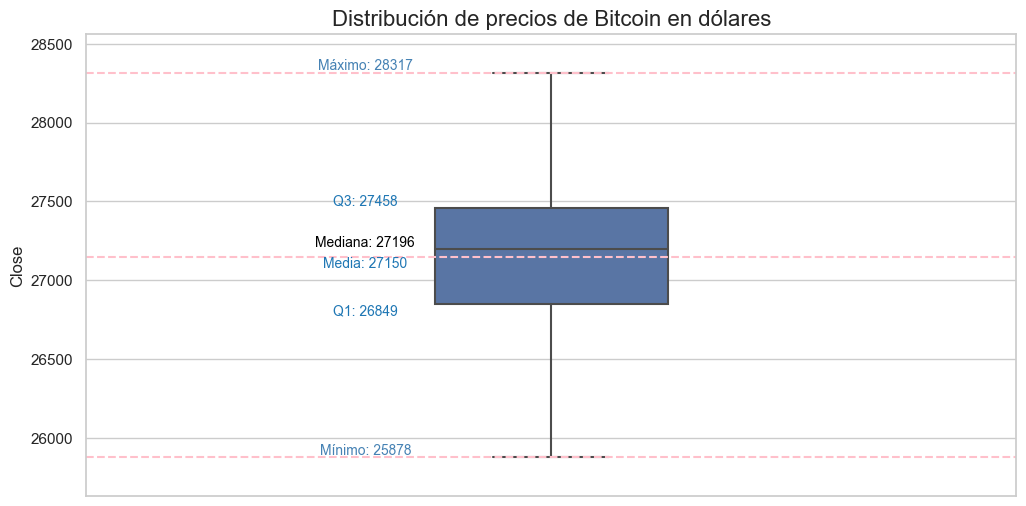

In [21]:
boxplot_grafico()

#Delimitando datos con query: entre Q1 y Q3

In [22]:
def between_quartiles():
    df=get_df_bitcoin_limpio()
    cuartiles = [0, 0.25, 0.5, 0.75, 1]
    valores = df['Close'].quantile(cuartiles)
    df_bitcoin_cuartiles = df.query('Close > ' + str(int(valores[0.25])) + ' & Close < ' + str(int(valores[0.75])))    

    return df_bitcoin_cuartiles

In [23]:
between_quartiles()

[*********************100%***********************]  1 of 1 completed


,Close,Volume,rsi,macd,macd_signal
Datetime,,,,,
2023-05-10 17:15,27280,545707008,12.0,-75.0,2.0
2023-05-10 17:20,27056,740827136,10.0,-147.0,-28.0
2023-05-10 17:25,27222,465917952,21.0,-189.0,-60.0
2023-05-10 17:30,27292,249242624,25.0,-215.0,-91.0
2023-05-10 17:35,27342,265672704,28.0,-228.0,-118.0
...,...,...,...,...,...
2023-05-16 10:10,27107,24223744,40.0,-23.0,-12.0
2023-05-16 10:20,27029,41082880,30.0,-31.0,-18.0
2023-05-16 10:25,27023,68642816,30.0,-36.0,-21.0


##Nuevo BOXPLOT desde Q1 a Q3

In [24]:
def new_boxplot():
    df_new= between_quartiles()

    sns.set(style="whitegrid", rc={"figure.figsize":(12,6)})

    cuartiles = [0, 0.25, 0.5, 0.75, 1]

    valores = df_new['Close'].quantile(cuartiles)

    colores = ['#4c72b0', '#55a868', '#c44e52', '#8172b2']

    sns.boxplot(y='Close', data=df_new, orient='v', palette=colores, whis=2, width=0.25)

    plt.axhline(y=valores[0], linestyle='--', color='#FFC0CB')
    plt.axhline(y=valores[1], linestyle='--', color='#FFC0CB')
    plt.axhline(y=df_new['Close'].mean(), linestyle='--', color='#FFC0CB')

    plt.text(-0.2, valores[0], f'Mínimo: {valores[0]:.0f}', fontsize=10, ha='center', va='bottom', color='#4682B4')
    plt.text(-0.2, valores[0.25], f'Q1: {valores[0.25]:.0f}', fontsize=10, ha='center', va='top', color='#1f77b4')
    plt.text(-0.2, valores[0.75], f'Q3: {valores[0.75]:.0f}', fontsize=10, ha='center', va='bottom', color='#1f77b4')
    plt.text(-0.2, valores[1], f'Máximo: {valores[1]:.0f}', fontsize=10, ha='center', va='bottom', color='#4682B4')
    plt.text(-0.2, df_new['Close'].mean(), f'Media: {df_new["Close"].mean():.0f}', fontsize=10, ha='center', va='top', color='#1f77b4')

    mediana = np.median(df_new['Close'])
    plt.text(0, mediana, f'Mediana: {mediana:.0f}', fontsize=10, ha='center', va='bottom', color='black')

    plt.ylim(valores[0]-0.1*(valores[1]-valores[0]), valores[1]+0.1*(valores[1]-valores[0]))

    plt.title('Distribución de precios de Bitcoin en dólares', fontsize=16)

    return  plt.show();


[*********************100%***********************]  1 of 1 completed


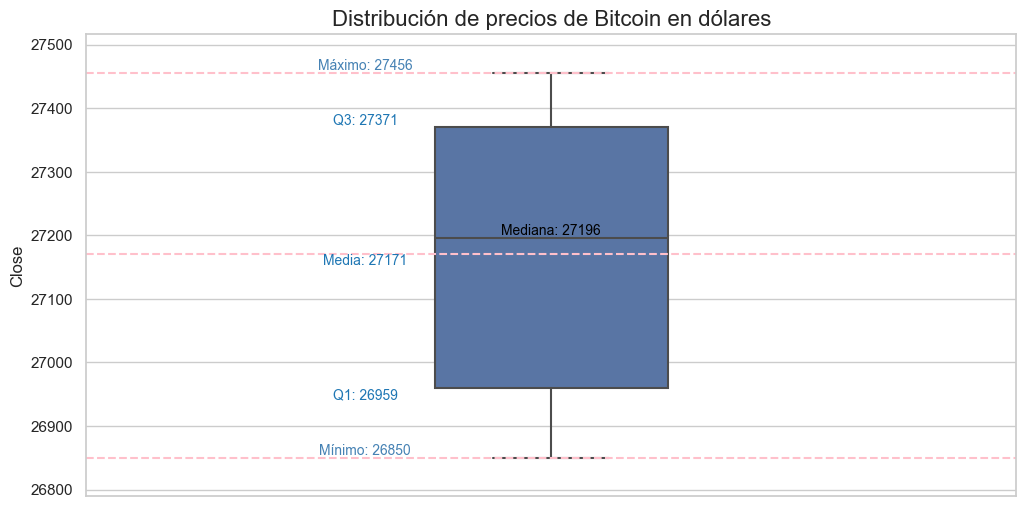

In [25]:
new_boxplot()

###Guardar en drive el df_bitcoin

In [17]:
# df_new= get_df_bitcoin()
# df_new.to_csv('/content/drive/MyDrive/BitCoin/bitcoin.csv',sep=';',index='False')

#Extraer Tendencias:

In [26]:
def extraer_tendencias():
    global precio_actual, tendencia
    
    # Hacer la petición GET a la página web
    page = requests.get('https://coinmarketcap.com/')
    
    # Crear el objeto BeautifulSoup a partir del HTML de la página web
    soup = BeautifulSoup(page.content, 'html.parser')
    
    # Encontrar el precio actual del Bitcoin
    precio = soup.find('a', {'href': '/currencies/bitcoin/markets/'}).find('span').text.strip().replace('$', '').replace(',', '')

    # Convertir el precio a un número en coma flotante
    precio_actual = float(precio)

    # Análisis de tendencia a partir del icono up o down
    span_element = soup.find('span', {'class': ['icon-Caret-up', 'icon-Caret-down']})
    if 'icon-Caret-up' in span_element['class']:
        tendencia = 'Alta'
    else:
        tendencia = 'Baja'
    
    # Encontrar la variación del precio
    porcentaje = soup.find('span', {'class': 'sc-97d6d2ca-0 bQjSqS'}).text.strip().replace('$', '').replace(',', '')

    return [int(precio_actual), tendencia,porcentaje]


In [27]:
extraer_tendencias()

[27038, 'Baja', '0.29%']

#Tomar decisiones

In [28]:
def tomar_decisiones():
    global symbol, period, interval, df_bitcoin, precio_actual, tendencia, media,rsi,macd,macdsignal,ma50,ma200
    
    df=between_quartiles()

    # Último RSI
    rsi=df['rsi'][-1]
    # Últimol MACD
    macd=df['macd'][-1]
    # Último MACD-SIGNAL
    macdsignal = df['macd_signal'][-1]

    # Calcular la media móvil de 50 días y 200 días
    df["ma50"] = df["Close"].rolling(50).mean()
    df["ma200"] = df["Close"].rolling(200).mean()

    ma50=df["ma50"].iloc[-1]
    ma200=df["ma200"].iloc[-1]

    #Precio actual
    precio = extraer_tendencias()[0]
    #Tendencia actual
    tendencia=extraer_tendencias()[1]
    #media
    media = df['Close'].mean()
    
    # Aplicar el criterio de decisión

    if precio > media and rsi > 50 and macd > macdsignal and precio > ma50 and precio > ma200:
        decision = "Comprar"
        explicacion ="Explicación: El precio actual está por encima de la media, el RSI es alto, el MACD está por encima de su señal, el precio actual está por encima\n de la MA50 y la MA200, lo que indica una tendencia alcista fuerte y una buena oportunidad para comprar."
    elif precio < media and rsi < 50 and macd < macdsignal and precio < ma50 and precio < ma200:
        decision = "Vender"
        explicacion ="Explicación: El precio actual está por debajo de la media, el RSI es bajo, el MACD está por debajo de su señal, el precio actual está por debajo\n de la MA50 y la MA200, lo que indica una tendencia bajista fuerte y una buena oportunidad para vender."
    else:
        decision = "Mantener"
        if tendencia == "Alta":
            if precio > media and precio > ma50 and precio > ma200:
                explicacion ="Explicación: El precio actual está por encima de la media, la MA50 y la MA200, lo que indica una tendencia alcista. Aunque el RSI y el MACD no son \nmuy altos, se recomienda mantener ya que la tendencia general es positiva y puede haber potencial para ganancias adicionales."
            elif precio < media and precio < ma50 and precio < ma200:
                explicacion ="Explicación: El precio actual está por debajo de la media, la MA50 y la MA200, lo que indica una tendencia bajista. Aunque el RSI y el MACD no son \nmuy bajos, se recomienda mantener ya que la tendencia general es negativa y puede haber potencial para disminución adicional en las pérdidas."
            else:
                explicacion ="Explicación: Aunque la tendencia general es alcista, el precio actual no está lo suficientemente por encima de la media, la MA50 y la MA200 para \njustificar una compra adicional. Sin embargo, tampoco hay señales fuertes de venta, por lo que se recomienda mantener y seguir observando."
        elif tendencia == "Baja":
            if precio < media and precio < ma50 and precio < ma200:
                explicacion ="Explicación: El precio actual está por debajo de la media, la MA50 y la MA200, lo que indica una tendencia bajista. Aunque el RSI y el MACD no son muy \nbajos, se recomienda mantener ya que la tendencia general es negativa y puede haber potencial para disminución adicional en las pérdidas."
            elif precio > media and precio > ma50 and precio > ma200:
                explicacion ="Explicación: El precio actual está por encima de la media, la MA50 y la MA200, lo que indica una tendencia alcista. Aunque el RSI y el MACD no son muy \naltos, se recomienda mantener ya que la tendencia general es positiva y puede haber potencial para disminución adicional en las pérdidas."
        
    return [decision,explicacion]


In [30]:
def puntos_compra_venta():
    global symbol, period, interval, df_bitcoin, precio_actual, tendencia, media,rsi,macd,macdsignal,ma50,ma200,df
    
    df=between_quartiles()

    # Calcular la media móvil de 50 días y 200 días
    df["ma50"] = df["Close"].rolling(50).mean()
    df["ma200"] = df["Close"].rolling(200).mean()

    #media
    media = df['Close'].mean()
    
    # Aplicar el criterio de decisión
    decisiones = []

    for filas in df.itertuples():
        if filas.Close > media and filas.rsi > 50 and filas.macd > filas.macd_signal and filas.Close > ma50 and filas.Close > ma200:
            decision = "Vender"
        elif filas.Close < media and filas.rsi < 50 and filas.macd < filas.macd_signal and filas.Close < ma50 and filas.Close < ma200:
            decision = "Comprar"
        else:
            decision = "Mantener"
        
        decisiones.append(decision)

    df['Decision'] = decisiones   
   
    return df


In [31]:
puntos_compra_venta()

[*********************100%***********************]  1 of 1 completed


,Close,Volume,rsi,macd,macd_signal,ma50,ma200,Decision
Datetime,,,,,,,,
2023-05-10 17:15,27280,545707008,12.0,-75.0,2.0,NaN,NaN,Mantener
2023-05-10 17:20,27056,740827136,10.0,-147.0,-28.0,NaN,NaN,Comprar
2023-05-10 17:25,27222,465917952,21.0,-189.0,-60.0,NaN,NaN,Mantener
2023-05-10 17:30,27292,249242624,25.0,-215.0,-91.0,NaN,NaN,Mantener
2023-05-10 17:35,27342,265672704,28.0,-228.0,-118.0,NaN,NaN,Mantener
...,...,...,...,...,...,...,...,...
2023-05-16 10:10,27107,24223744,40.0,-23.0,-12.0,27147.06,27302.980,Comprar
2023-05-16 10:20,27029,41082880,30.0,-31.0,-18.0,27147.90,27302.145,Comprar
2023-05-16 10:25,27023,68642816,30.0,-36.0,-21.0,27150.80,27301.285,Comprar


In [117]:

def grafico_compra_venta():
   grafico=puntos_compra_venta()
   grafico['Buy_Signal'] = np.where(grafico['Decision'] == 'Comprar', grafico['Close'], np.nan)
   grafico['Sell_Signal'] = np.where(grafico['Decision'] == 'Vender', grafico['Close'], np.nan)
   grafico = grafico[['Close', 'Buy_Signal', 'Sell_Signal']]

   graph = grafico
   graph = get_df_bitcoin_limpio()

   titulo = 'Precio y Señales de Compra y Venta'
   # plt.clf()
   plt.figure(figsize=(22,7))                    
   plt.title(titulo, loc='left', fontsize=22, color='#607d8b', fontweight="bold", pad = 30)
   plt.plot(graph.index, graph['Close'], label='Precio del Dia', alpha = 0.8)
   plt.plot(grafico.index, grafico['Buy_Signal'], color='green', label='Compra', marker='^', alpha=1, markersize=7)
   plt.plot(grafico.index, grafico['Sell_Signal'], color='red', label='Venta', marker='v', alpha=1, markersize=7)
   # plt.xticks(rotation=45, fontsize=8)

   n = 20  # Número de divisiones
   step = int(len(graph) / n)  # Espaciado entre las divisiones
   # xticks_labels = [grafico['Close'].iloc[i] for i in range(0, len(grafico), step)]  # Etiquetas para las divisiones
   xticks_labels = [graph.index[i] for i in range(0, len(graph), step)]
   plt.xticks(range(0, len(graph), step), xticks_labels, fontsize=8,rotation=45)

   plt.yticks(fontsize=8)
   plt.xlabel('Fecha', color='#607d8b', fontsize=20)
   plt.ylabel('Precio del Dia', color='#607d8b', fontsize=20)
   # plt.annotate('$Saldo = {0:.0f}$'.format(round(saldo_money,0)), xy=(0.88, 0.72), xycoords='axes fraction', fontsize=20)
   plt.legend(loc='best', fontsize=15)
   return plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


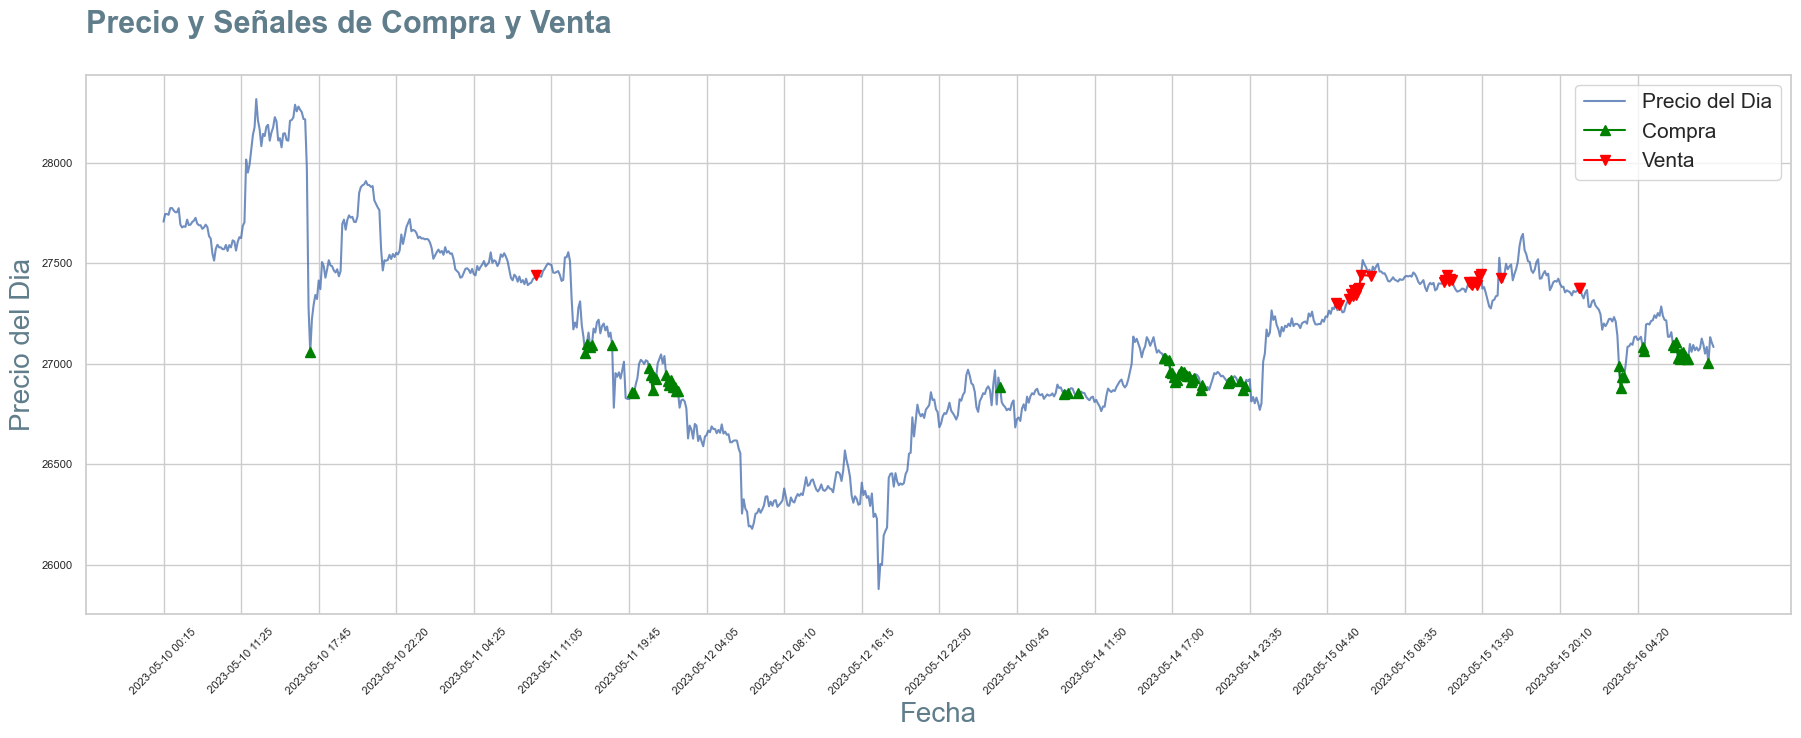

In [118]:
grafico_compra_venta()

In [19]:
def print_algoritmo_decision():
    print('Decisión:', tomar_decisiones()[0]),print(tomar_decisiones()[1]),print('Tendencia:',tendencia),print('Media:',int(media)),print('Precio:',int(precio_actual)),print('RSI:',rsi),
    print('MACD:',macd),print('M-Signal:',macdsignal), print('ma50:',ma50), print('ma200:',ma200)
    return

In [20]:
tomar_decisiones()

[*********************100%***********************]  1 of 1 completed


['Comprar',
 'Explicación: El precio actual está por encima de la media, el RSI es alto, el MACD está por encima de su señal, el precio actual está por encima\n de la MA50 y la MA200, lo que indica una tendencia alcista fuerte y una buena oportunidad para comprar.']

In [21]:
print_algoritmo_decision()

[*********************100%***********************]  1 of 1 completed
Decisión: Comprar
[*********************100%***********************]  1 of 1 completed
Explicación: El precio actual está por encima de la media, el RSI es alto, el MACD está por encima de su señal, el precio actual está por encima
 de la MA50 y la MA200, lo que indica una tendencia alcista fuerte y una buena oportunidad para comprar.
Tendencia: Alta
Media: 27217
Precio: 27490
RSI: 57.0
MACD: 23.0
M-Signal: 19.0
ma50: 27396.44
ma200: 27240.76


In [72]:
get_df_bitcoin_limpio().isna().sum()

[*********************100%***********************]  1 of 1 completed


Close           0
Volume          0
rsi             9
macd           11
macd_signal    11
dtype: int64

In [78]:
df_grafico=puntos_compra_venta()
data = get_df_bitcoin_limpio()

df_grafico['Buy_Signal'] = np.where(df_grafico['Decision'] == 'Comprar', df_grafico['Close'], np.nan)
df_grafico['Sell_Signal'] = np.where(df_grafico['Decision'] == 'Vender', df_grafico['Close'], np.nan)
df_grafico = df_grafico[['Buy_Signal', 'Sell_Signal']]
df_merged = data.join(df_grafico)
(df_merged).isna().sum()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Close            0
Volume           0
rsi              9
macd            11
macd_signal     11
Buy_Signal     861
Sell_Signal    906
dtype: int64

#Gráfico de lineas para ver la tendencia

In [114]:
def grafica_tendencias():
    #Data Frame
    data = get_df_bitcoin_limpio()

    #Calcular media:
    mean_price = data["Close"].mean()

    #Desicion:
    decision=tomar_decisiones()[0]

    #Explicacion:
    explicacion=tomar_decisiones()[1]


    #puntos de compra/venta
    df_grafico=puntos_compra_venta()
    df_grafico['Buy_Signal'] = np.where(df_grafico['Decision'] == 'Comprar', df_grafico['Close'], np.nan)
    df_grafico['Sell_Signal'] = np.where(df_grafico['Decision'] == 'Vender', df_grafico['Close'], np.nan)
    df_grafico = df_grafico[['Decision' ,'Buy_Signal', 'Sell_Signal']]
    df_merged = data.join(df_grafico)


    # Calcular indicadores técnicos
    data["MA50"] = data["Close"].rolling(window=50).mean()
    data["MA200"] = data["Close"].rolling(window=200).mean()
    data["RSI"] = data['rsi']
    data["MACD"]= data['macd']
    data["M-Signal"] =data['macd_signal']

    # Graficar los precios con las medias móviles
    fig, ax = plt.subplots(figsize=(16,8))
    data["Close"].plot(ax=ax, color="grey", label="Precio", linewidth=0.7)
    data["MA50"].plot(ax=ax, color="blue", label="Media Móvil de 50 días", linewidth=0.5)
    data["MA200"].plot(ax=ax, color="red", label="Media Móvil de 200 días", linewidth=0.5)
 
    ax.plot(df_merged.index, df_merged['Buy_Signal'], color='green', label='Compra', marker='^', alpha=1, markersize=5)
    ax.plot(df_merged.index, df_merged['Sell_Signal'], color='red', label='Venta', marker='v', alpha=1, markersize=5)
    
    ax.axhline(y=mean_price, color="pink", linestyle="--",label='Precio Medio', linewidth=1)
    ax.legend(loc="best",fontsize=9)
    ax.set_xlabel("Fecha",fontsize=9)
    ax.set_ylabel("Precio (USD)",fontsize=9)
    ax.set_title("Bitcoin Precios con Medias Móviles")

    # Aumentar el número de divisiones en el eje x
    n = 20 # Número de divisiones
    step = int(len(data) / n) # Espaciado entre las divisiones
    xticks_labels = [data.index[i] for i in range(0, len(data), step)] # Etiquetas para las divisiones
    ax.set_xticks(range(0, len(data), step))
    ax.set_xticklabels(xticks_labels, rotation=45, ha='right', fontsize=8)

    #Texto explicativo de la grafica:
    text_price_medias= "Esta gráfica muestra el precio histórico de Bitcoin en color gris, junto con las medias móviles de 50 y 200 días en azul y rojo, respectivamente. La media móvil de 50 días \nse utiliza comúnmente como un indicador de tendencia a corto plazo, mientras que la media móvil de 200 días se utiliza como un indicador de tendencia a largo plazo."


    # Mostrar decision en grafico
    ax.text(0.5, 0.95, f"Decisión: {decision}", transform=ax.transAxes, fontsize=20, color='red', verticalalignment='top',horizontalalignment='center', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

    ax.text(-0.03, -0.3,explicacion, transform=ax.transAxes, fontsize=10, ha="left",color='blue')
    ax.text(-0.03, -0.41,text_price_medias, transform=ax.transAxes, fontsize=9, ha="left")

    # Graficar el RSI
    fig, ax = plt.subplots(figsize=(16,8))
    data["RSI"].plot(ax=ax, color="purple", label='Índice de Fuerza Relativa',linewidth=0.7)
    ax.axhline(y=70, color="green", linestyle="--",label='Nivel de Sobrecompra: 70',linewidth=0.9)
    ax.axhline(y=30, color="red", linestyle="--",label='Nivel de Sobreventa: 30',linewidth=0.9)
    ax.legend(loc="best",fontsize=9)
    ax.set_xlabel("Fecha")
    ax.set_ylabel("RSI")
    ax.set_title("RSI")

    #Texto explicativo de RSI:
    text_RSI_01= "Interpretación: Esta gráfica muestra el Indice de Fuerza Relativa (RSI) de Bitcoin en color morado. Los valores del RSI"
    text_RSI_02= "oscilan entre 0 y 100, y los niveles de sobrecompra y sobreventa se definen típicamente en 70 y 30, respectivamente."
    text_RSI_03= "Cuando el RSI se acerca a los 30, se considera que el precio de Bitcoin está sobrevendido y podría aumentar en el futuro."
    text_RSI_04= "Cuando el RSI se acerca a los 70, se considera que el precio de Bitcoin está sobrecomprado y podría disminuir en el futuro."

    ax.text(0, -0.20,text_RSI_01, transform=ax.transAxes, fontsize=10, ha="left")
    ax.text(0, -0.25,text_RSI_02 , transform=ax.transAxes, fontsize=10, ha="left")
    ax.text(0, -0.3,text_RSI_03, transform=ax.transAxes, fontsize=10, ha="left")
    ax.text(0, -0.35,text_RSI_04 , transform=ax.transAxes, fontsize=10, ha="left")

    # Graficar el MACD y la MACD-Señal
    fig, ax = plt.subplots(figsize=(16,8))

    data["MACD"].plot(ax=ax, color="blue", label="MACD: Diferencia entre MA de 12 y 26 días",linewidth=0.7)
    data["M-Signal"].plot(ax=ax, color="red", label="M-Signal: : MA de 9 días del MACD",linewidth=0.7)
    ax.axhline(y=0, color="black", linestyle="--",linewidth=0.7)
    ax.legend(loc="best",fontsize=9)
    ax.set_xlabel("Fecha")
    ax.set_ylabel("MACD")
    ax.set_title("MACD y Señal")

    #Texto explicativo de MACD y la MACD-Señal:
    text_MACD_01= "El gráfico muestra el indicador MACD y su señal para el precio de Bitcoin. El MACD es un indicador que se utiliza para"
    text_MACD_02= "identificar cambios en la tendencia y la fuerza de los movimientos de los precios. Se calcula a partir de la diferencia"
    text_MACD_03= "entre dos promedios móviles exponenciales de diferentes periodos. La línea de señal es una media móvil exponencial del MACD."
    text_MACD_04= "Cuando la línea del MACD cruza por encima de la línea de señal, es una señal alcista, y cuando cruza por debajo, es una señal bajista."

    # Agregar cuadro de texto debajo del gráfico
    ax.text(0, -0.2,text_MACD_01, transform=ax.transAxes, fontsize=10, ha="left", color='black')
    ax.text(0, -0.25,text_MACD_02, transform=ax.transAxes, fontsize=10, ha="left", color='black')
    ax.text(0, -0.3,text_MACD_03, transform=ax.transAxes, fontsize=10, ha="left", color='black')
    ax.text(0, -0.35,text_MACD_04 , transform=ax.transAxes, fontsize=10, ha="left", color='black')

    # Mostrar la gráfica
    return plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


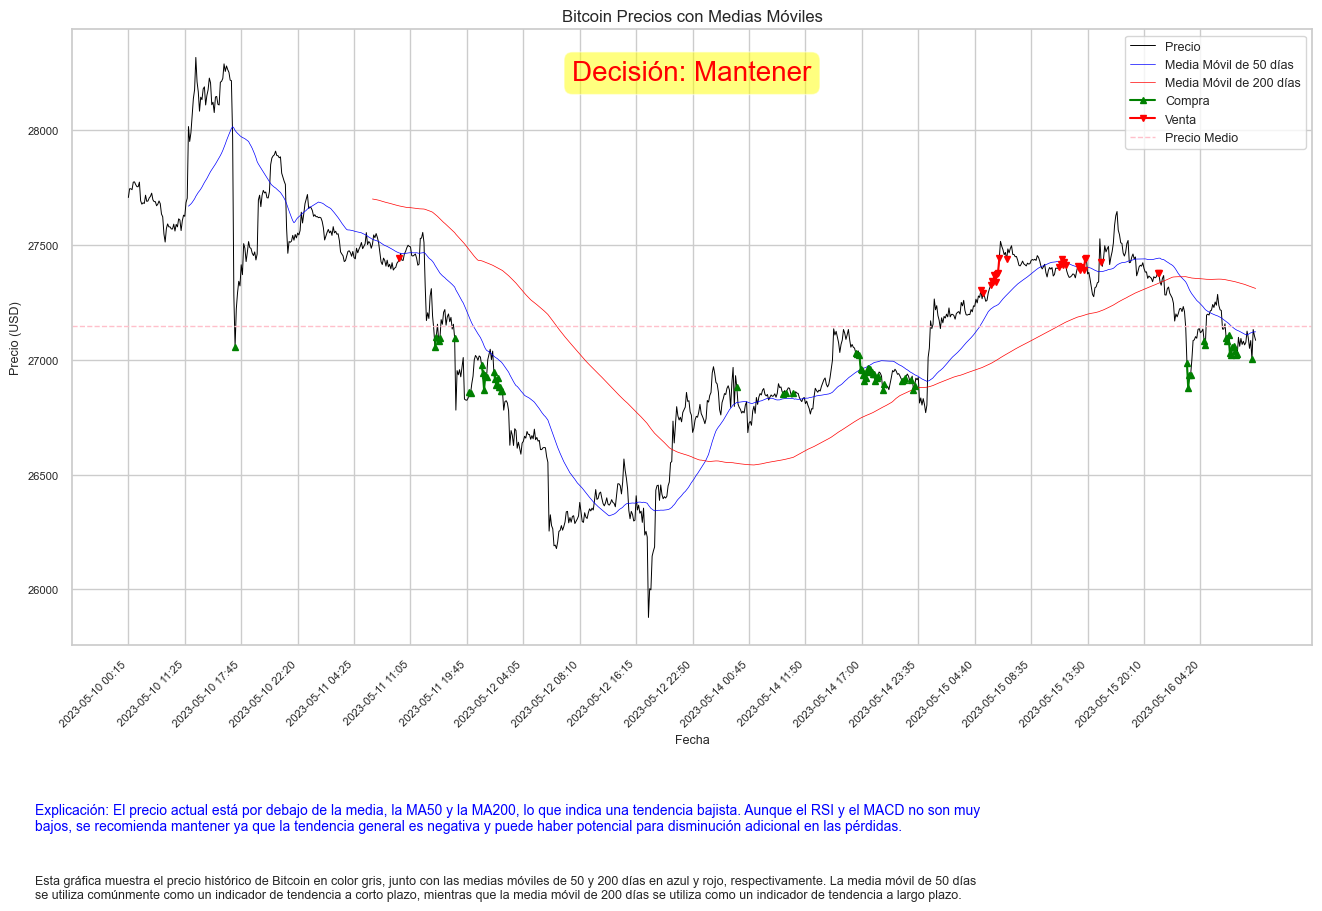

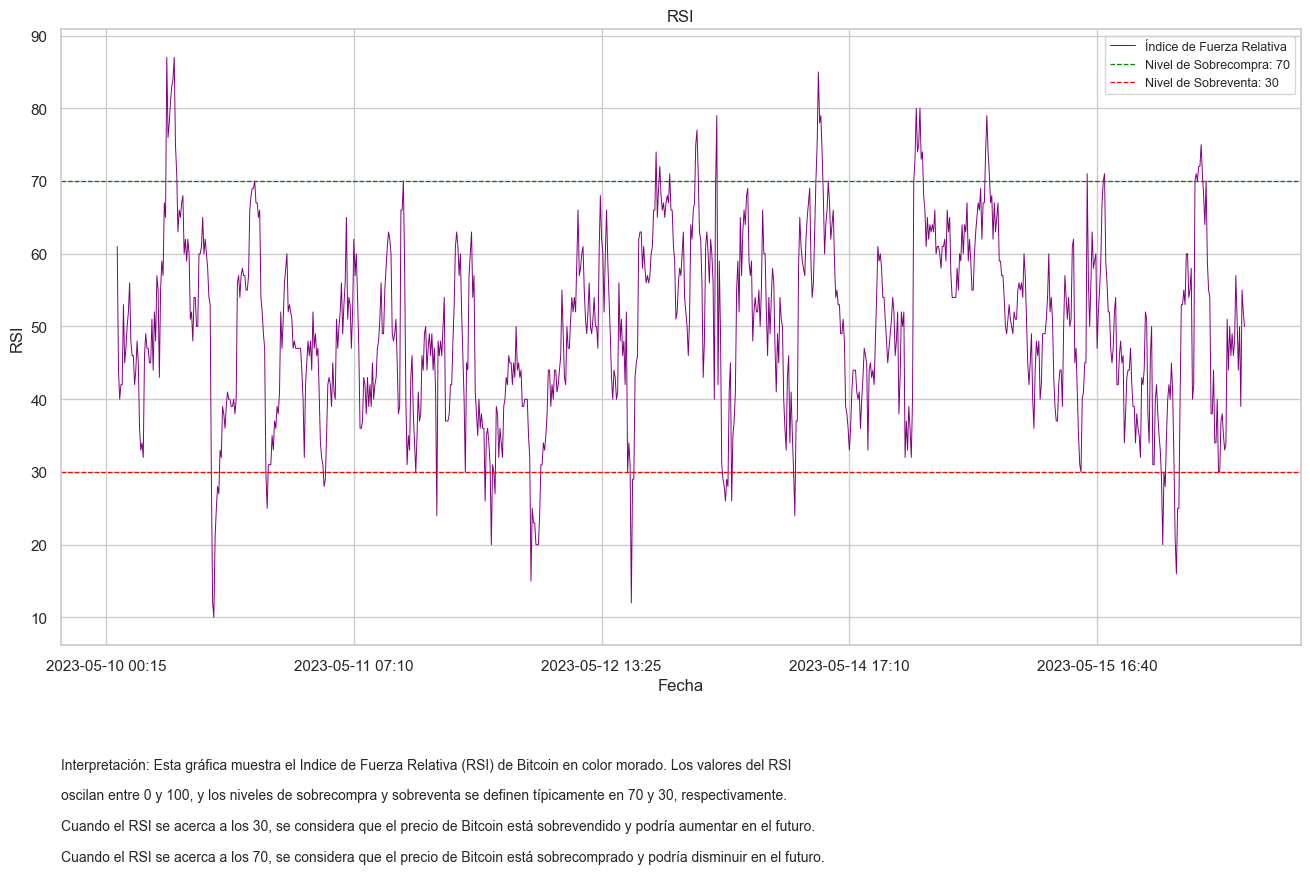

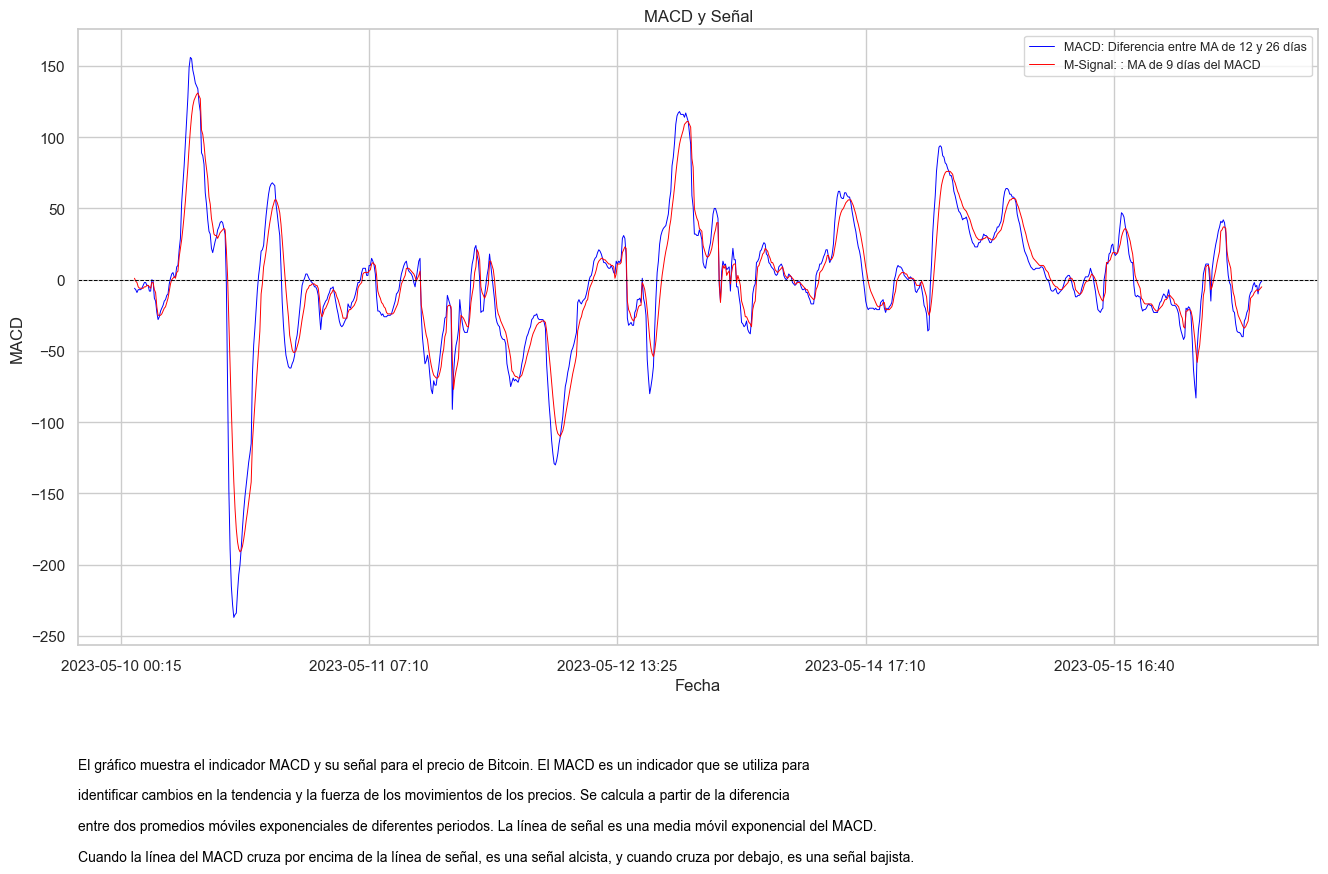

In [113]:
grafica_tendencias()

#Automatizar:

In [46]:
def automatizar():
      contador=0
      while True:
          contador+=1
          get_df_bitcoin()
          get_df_bitcoin_limpio()
          between_quartiles()
          extraer_tendencias()
          tomar_decisiones()
          
          tz = pytz.timezone('America/Argentina/Buenos_Aires')
          now = datetime.datetime.now(tz)
          print("Hora de verificación:", now.strftime("%H:%M:%S"))
          print("Ejecuciones: " ,contador," \n")
          print("-----------------------------------\n")
          print_algoritmo_decision()
          print("-----------------------------------\n")
          grafica_tendencias()
          clear_output(wait=True)

          time.sleep(300) #ciclo cada 300 segundos
      return

In [52]:
# automatizar()